In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain
from IPython.display import display, Math, Markdown
import os
import glob
%matplotlib inline

# Question 1 - Perspective and orthographic projections

In [3]:
def draw_poly(points,xlim,ylim,title,color):
  '''
  This function draws a polygon on a 2D axes. 
  Parameter 'points' is an array of (x,y) coordinates.
  The first point in 'points' is concatenated again to the end of the array, to
  create a closed polygon form. 
  '''
  _, ax = plt.subplots(figsize=(3, 3))
  points_axis = list(zip(*points+[points[0]]))
  ax.set_ylabel('Y axis')
  ax.set_xlabel('X axis')
  ax.set_ylim(ylim[0],ylim[1])
  ax.set_xlim(xlim[0],xlim[1])
  ax.set_title(title)
  ax.plot(*points_axis, color=color)
  return ax


def write_points(points):
    display(Markdown("The image points $P_i$ are:"))
    display(Math(r",".join([r"({:.2f},{:.2f})".format(*p)
                            for p in points])))

## Section A

The polygon points:
[[ 0.4  2.4  4. ]
 [-1.8 -3.6  6. ]
 [ 1.4  0.4  2. ]
 [-1.5  0.6  3. ]
 [ 2.5 -3.   5. ]]


The image points $P_i$ are:

<IPython.core.display.Math object>

<AxesSubplot:title={'center':"Projection on Camera A's Image Plane"}, xlabel='X axis', ylabel='Y axis'>

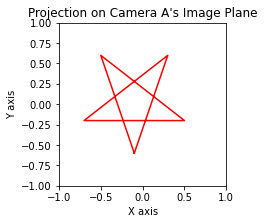

In [4]:
# =================  Write here the polygon's world points
p_w = np.array([[0.4,2.4,4.0],[-1.8,-3.6,6.0],[1.4,0.4,2.0],[-1.5,0.6,3.0],[2.5,-3.0,5.0]])

print("The polygon points:")
print(p_w)


# =================

# Camera's focal length
f = 1

# Camera's world position
xc=0
yc=0
zc=0


# =================  Change this to the solution of the question (i.e., find the projected points on the image plane)
image_a_pts = np.array([-f * (p_w[:,0]/ p_w[:,2]), -f * (p_w[:,1]/ p_w[:,2])]).T.tolist()
# ================= 
write_points(image_a_pts)
draw_poly(image_a_pts,[-1,1],[-1,1],'Projection on Camera A\'s Image Plane','red')

## Section b

The image points $P_i$ are:

<IPython.core.display.Math object>

<AxesSubplot:title={'center':"Projection on Camera B's Image Plane"}, xlabel='X axis', ylabel='Y axis'>

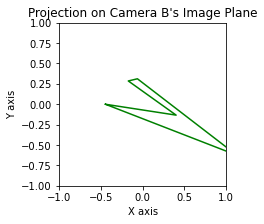

In [5]:
# Camera's focal length
f=1

# Camera's world position
xc=-5
yc=0
zc=4

K_hom = np.array([[-f, 0, 0, 0],[0, -f, 0, 0],[0, 0, 1, 0]])

theta_x = np.radians(0)
theta_y = np.radians(-90)
theta_z = np.radians(-90)

x_rot = np.array([[1,0,0],[0,np.cos(theta_x), -np.sin(theta_x)],[0, np.sin(theta_x),np.cos(theta_x)]])
y_rot = np.array([[np.cos(theta_y),0,np.sin(theta_y)],[0,1,0],[-np.sin(theta_y),0,np.cos(theta_y)]])
z_rot = np.array([[np.cos(theta_z), -np.sin(theta_z),0],[np.sin(theta_z),np.cos(theta_z),0],[0,0,1]])

F = np.dot(z_rot, y_rot)

vec = np.dot(F, np.array([-xc, -yc, -zc]))

F_hom = np.zeros((4,4))
F_hom[3,3] = 1
F_hom[0:3,3] = vec
F_hom[0:3,0:3] = F

M = np.dot(K_hom,F_hom)

p_w_hom = np.ones((4,5))
p_w_hom[0:3, 0:5] = p_w.T

res_hom = np.dot(M, p_w_hom) 

res_test = np.array([res_hom[0,:]/res_hom[2,:],res_hom[1,:]/res_hom[2,:]]).T.tolist()

# =================  Change this to the solution of the question (i.e., find the projected points on the image plane)
res = np.array([(-f * p_w[:,1] / (p_w[:,0] + 5)), (f * (- p_w[:,2] + 4) / (p_w[:,0]+5))]).T.tolist()

image_b_pts = res
# ================= 
write_points(image_b_pts)
draw_poly(image_b_pts,[-1,1],[-1,1],'Projection on Camera B\'s Image Plane','green')

## Section c

The image points $P_i$ are:

<IPython.core.display.Math object>

<AxesSubplot:title={'center':"Orthographic projection on Camera B's Image Plane"}, xlabel='X axis', ylabel='Y axis'>

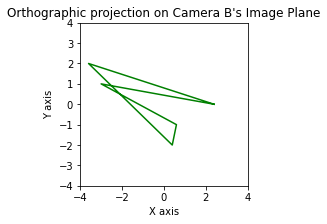

In [8]:
probably_points = p_w

K_hom = np.array([[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 0, 1]])

theta_x = np.radians(0)
theta_y = np.radians(-90)
theta_z = np.radians(-90)

x_rot = np.array([[1,0,0],[0,np.cos(theta_x), -np.sin(theta_x)],[0, np.sin(theta_x),np.cos(theta_x)]])
y_rot = np.array([[np.cos(theta_y),0,np.sin(theta_y)],[0,1,0],[-np.sin(theta_y),0,np.cos(theta_y)]])
z_rot = np.array([[np.cos(theta_z), -np.sin(theta_z),0],[np.sin(theta_z),np.cos(theta_z),0],[0,0,1]])

F = np.dot(z_rot, y_rot)

vec = np.dot(F, np.array([-xc, -yc, -zc]))

F_hom = np.zeros((4,4))
F_hom[3,3] = 1
F_hom[0:3,3] = vec
F_hom[0:3,0:3] = F

M = np.dot(K_hom,F_hom)
p_w_hom = np.ones((4,5))
p_w_hom[0:3, 0:5] = p_w.T

res_hom = np.dot(M, p_w_hom) 
res_test = np.array([res_hom[0,:]/res_hom[2,:],res_hom[1,:]/res_hom[2,:]]).T.tolist()

res = np.array([(p_w[:,1] / (p_w[:,0] + 5)),((p_w[:,2] - 4) / (p_w[:,0]+5))]).T.tolist()

# =================  Change this to the solution of the question (i.e., find the projected points on the image plane)
image_b_pts_orth = res_test
# ================= 

write_points(image_b_pts_orth)
draw_poly(image_b_pts_orth,[-4,4],[-4, 4],'Orthographic projection on Camera B\'s Image Plane','green')

# Question 2 - Camera calibration

## Section A

In [6]:
base_path = "./chess_board_images_b_w/"
chess_imgs_list = os.listdir(base_path)
images_grey = []
images_RGB = []
for i in range(0,len(chess_imgs_list)):
    bgr_img = cv2.imread(base_path + chess_imgs_list[i])
    gray = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)
    RGB = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
    images_grey.append(gray)
    images_RGB.append(RGB)

In [7]:
# Plot Greyscale chess board images:

#_, axes = plt.subplots(7, 3,
                     #  figsize=(15,40))

#for (i, image), ax in zip(enumerate(images_grey), chain.from_iterable(axes)):
#    ax.imshow(image, cmap='gray')
#    ax.set_title(f"Image {i}")

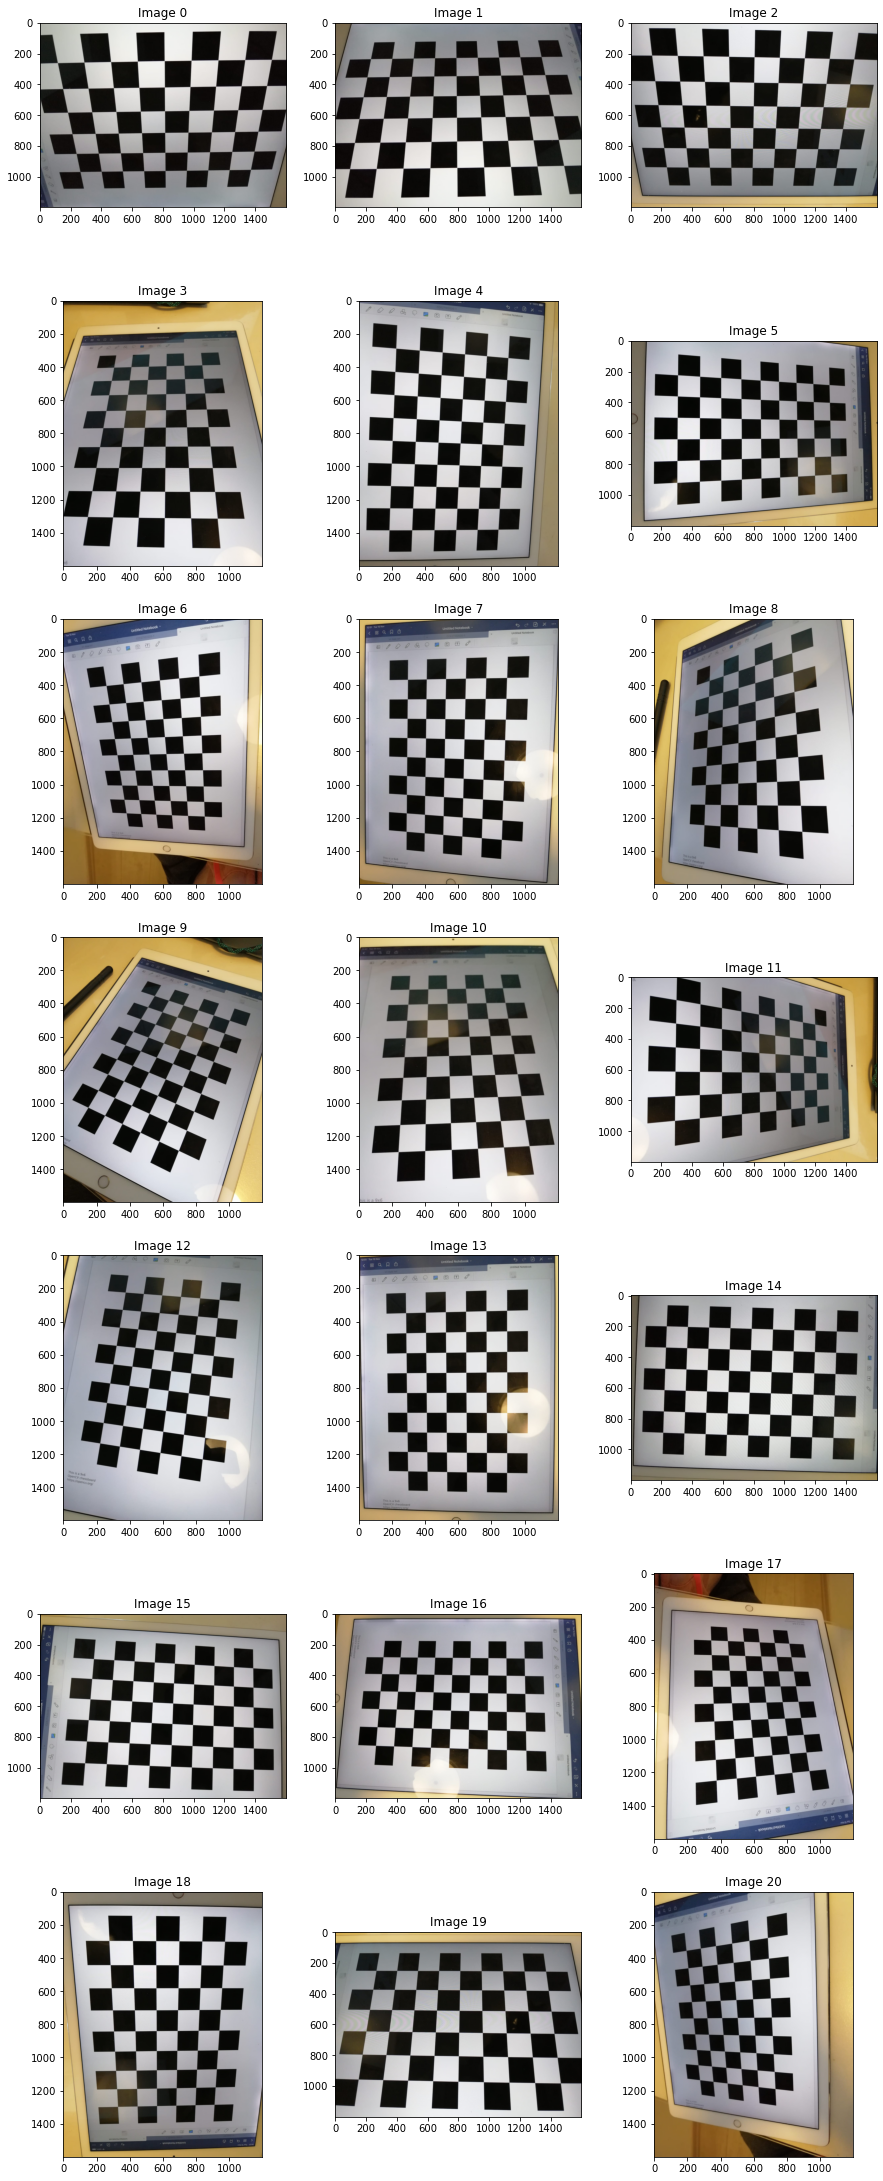

In [8]:
# Plot RGB chess board images:

_, axes = plt.subplots(7, 3,
                       figsize=(15,40))

for (i, image), ax in zip(enumerate(images_RGB), chain.from_iterable(axes)):
    ax.imshow(image)
    ax.set_title(f"Image {i}")

In [9]:
images_RGB[0].shape

(1200, 1600, 3)

In [10]:
# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
world_points = [] # 3d point in real world space.
image_corners = [] # 2d points in image plane.

images = os.listdir(base_path)
drow_corners = [] 
i = 0 
for fname in images:
    i = i +1
    img = cv2.imread(base_path + fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners 
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None) #None
    # If found, add object points, image points (after refining them)
    
    if ret == True:
        world_points.append(objp)

        #corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        #image_corners.append(corners2)
        image_corners.append(corners)

        # Draw and display the corners
        #img = cv2.drawChessboardCorners(img, (9,6), corners2, ret)
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
        drow_corners.append(img)
        cv2.imwrite("results_q2_A/result_" + fname[:-5] + ".jpg", img) 

### The Chess board corners:

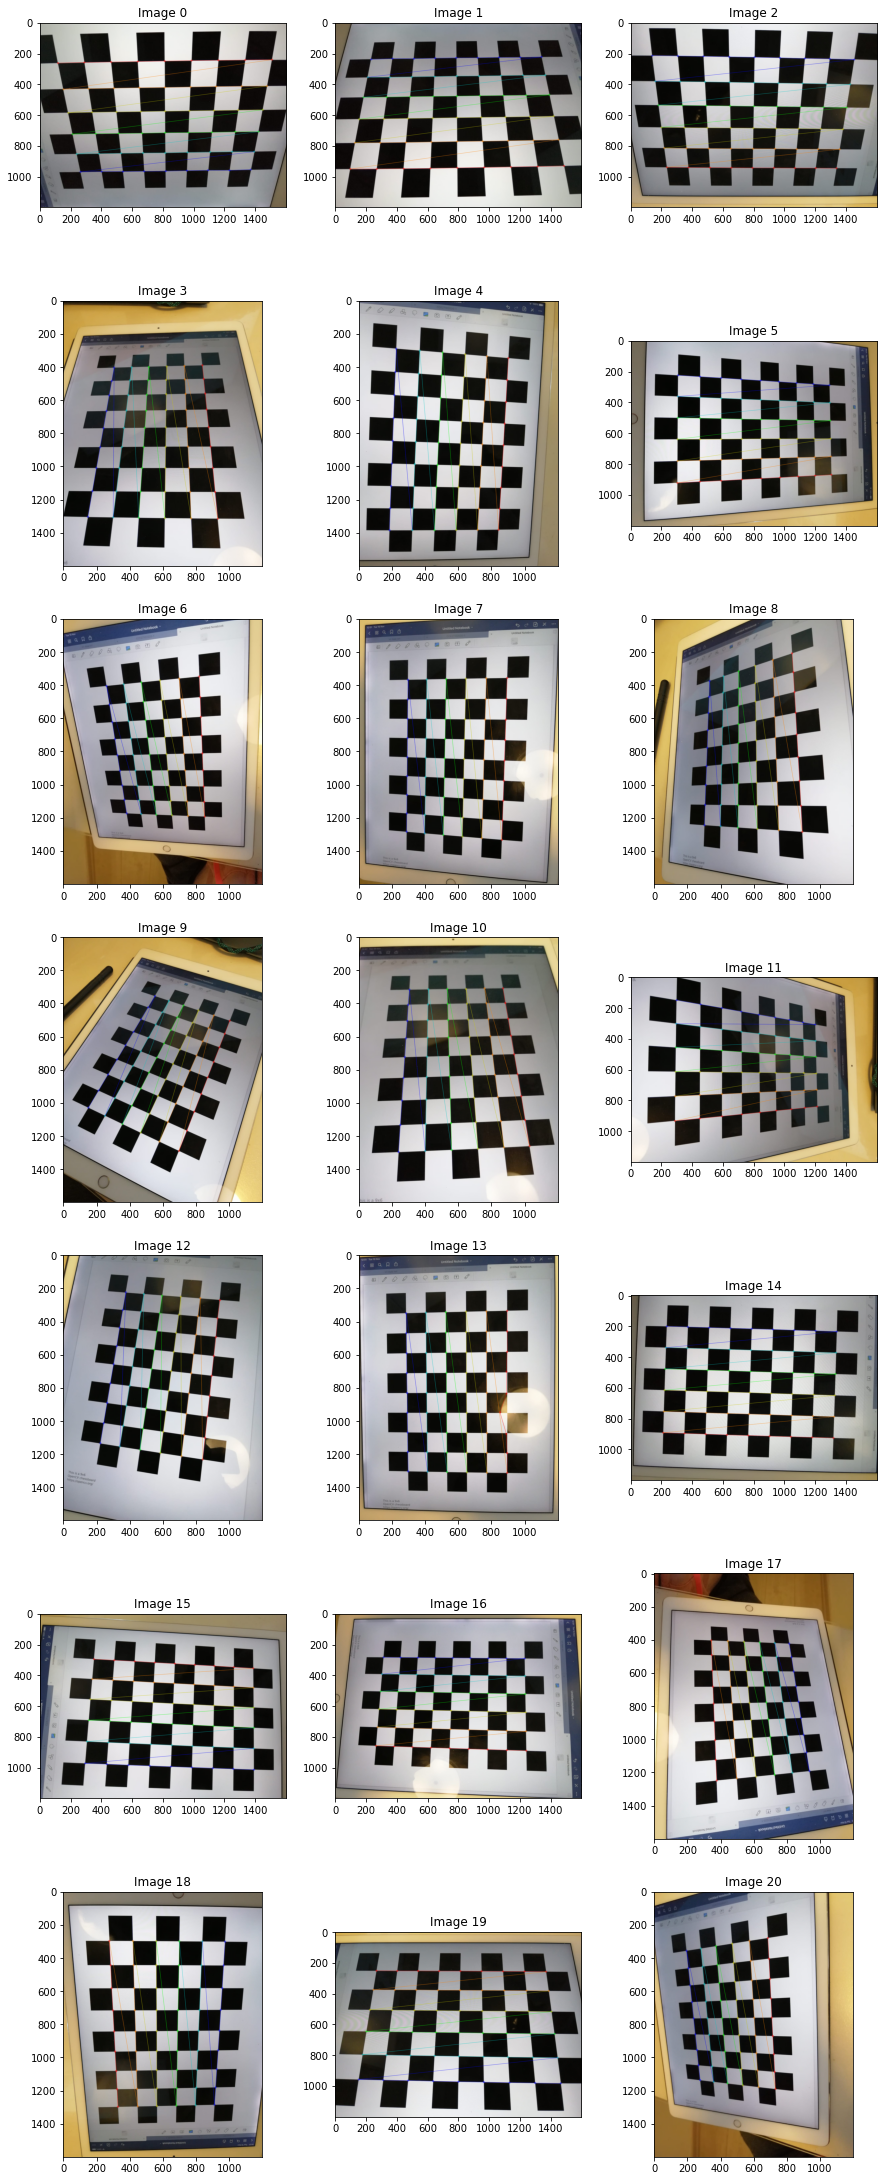

In [11]:
_, axes = plt.subplots(7, 3,
                       figsize=(15,40))

for (i, image), ax in zip(enumerate(drow_corners), chain.from_iterable(axes)):
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Image {i}")

## Section B

In [12]:
print(world_points[0])

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]]


## Section C - Perform a calibration

In [13]:
ret, cameraMatrix, distCoeffs, rotation_vecs, translation_vecs = cv2.calibrateCamera(world_points, image_corners, gray.shape[::-1], np.identity(3), None)

In [14]:
print(ret)

4.082266788781993


In [15]:
print(cameraMatrix)

[[1.36203365e+03 0.00000000e+00 6.98753332e+02]
 [0.00000000e+00 1.36090556e+03 6.71768122e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [16]:
print(distCoeffs)

[[-0.12055615  0.23675179 -0.00462749 -0.00510707 -0.32732872]]


In [17]:
for i in range(len(rotation_vecs)):
    print("rotation vector for image", i)
    print(rotation_vecs[i])

rotation vector for image 0
[[ 0.43137359]
 [ 0.04464785]
 [-0.02535632]]
rotation vector for image 1
[[-0.06405918]
 [-0.58358117]
 [-3.08673997]]
rotation vector for image 2
[[ 0.0199128]
 [-0.5371085]
 [ 3.1012718]]
rotation vector for image 3
[[-0.46079021]
 [ 0.4504631 ]
 [ 1.50518847]]
rotation vector for image 4
[[-0.09787995]
 [-0.09418929]
 [ 1.61912883]]
rotation vector for image 5
[[-0.30919464]
 [ 0.03885955]
 [ 3.11721056]]
rotation vector for image 6
[[ 0.32449926]
 [-0.05135675]
 [ 1.50202441]]
rotation vector for image 7
[[0.10829116]
 [0.09221554]
 [1.58955113]]
rotation vector for image 8
[[0.14000323]
 [0.55100935]
 [1.43893864]]
rotation vector for image 9
[[-0.33524045]
 [ 0.47578191]
 [ 1.92434518]]
rotation vector for image 10
[[-0.44988594]
 [ 0.31316844]
 [ 1.48165462]]
rotation vector for image 11
[[-0.71255844]
 [ 0.03223105]
 [ 3.05290836]]
rotation vector for image 12
[[-0.06863444]
 [ 0.20136138]
 [ 1.68339753]]
rotation vector for image 13
[[0.03100893]
 

In [18]:
for i in range(len(translation_vecs)):
    print("translation vector for image", i)
    print(translation_vecs[i])

translation vector for image 0
[[-3.36752405]
 [-2.33730697]
 [ 7.86649577]]
translation vector for image 1
[[4.54206727]
 [1.52070529]
 [7.58025822]]
translation vector for image 2
[[4.60961788]
 [2.04412198]
 [9.76639021]]
translation vector for image 3
[[ 1.32562288]
 [-2.61734219]
 [12.92244187]]
translation vector for image 4
[[ 1.54614234]
 [-2.46135852]
 [10.38157972]]
translation vector for image 5
[[ 5.05386932]
 [ 1.69701618]
 [11.22297849]]
translation vector for image 6
[[ 0.97547666]
 [-2.58764945]
 [11.34738875]]
translation vector for image 7
[[ 1.52934108]
 [-2.48224006]
 [10.94104499]]
translation vector for image 8
[[ 1.02609122]
 [-3.64457707]
 [10.99258355]]
translation vector for image 9
[[ 3.08173271]
 [-1.65848218]
 [13.92676377]]
translation vector for image 10
[[ 1.53219451]
 [-3.24304758]
 [12.41019129]]
translation vector for image 11
[[ 4.61970766]
 [ 1.61285278]
 [12.18244109]]
translation vector for image 12
[[ 2.09593323]
 [-3.43147237]
 [11.73815165]]
tr

## Section D  - Camera matrix

In [19]:
extrinsic_transformations = []
for i in range(len(rotation_vecs)):
    extr = np.zeros((4,4))
    extr[0:3, 0:3] = cv2.Rodrigues(rotation_vecs[i])[0]
    extr[0:3,3] = translation_vecs[i].T
    extr[3,3] = 1
    extrinsic_transformations.append(extr)

M_matrices = [] 
Hom_cameraMatrix = np.zeros((3,4))
Hom_cameraMatrix[0:3,0:3] = cameraMatrix
for i in range(len(extrinsic_transformations)):
    M_matrices.append(np.dot(Hom_cameraMatrix, extrinsic_transformations[i]))

In [20]:
for i in range(len(translation_vecs)):
    print("M_matrices image", i)
    print(M_matrices[i])

M_matrices image 0
[[ 1.32627874e+03  3.38014109e+02  6.85655198e+02  9.10059052e+02]
 [-5.32067191e+01  1.51621264e+03  4.00578734e+01  2.10360703e+03]
 [-4.86402759e-02  4.17375733e-01  9.07431331e-01  7.86649577e+00]]
M_matrices image 1
[[-1.33297385e+03  2.64666056e+02  7.04644938e+02  1.14831792e+04]
 [ 3.77999066e+01 -1.02186510e+03  1.12147191e+03  7.16171212e+03]
 [ 3.99674408e-02  3.64930314e-01  9.30176580e-01  7.58025822e+00]]
M_matrices image 2
[[-1.35389402e+03 -2.30010596e+02  6.76356418e+02  1.31027524e+04]
 [-3.16472606e+00 -1.50754793e+03  1.75001685e+02  9.34260659e+03]
 [ 1.14587264e-02 -3.36313509e-01  9.41680371e-01  9.76639021e+00]]
M_matrices image 3
[[-3.60115308e+02 -1.36954977e+03  5.81414042e+02  1.08351423e+04]
 [ 7.66172043e+02  1.19443217e+01  1.31002828e+03  5.11892896e+03]
 [-5.50428440e-01 -1.10737168e-02  8.34808903e-01  1.29224419e+01]]
M_matrices image 4
[[-7.20963388e+01 -1.43484805e+03  5.28587816e+02  9.36006131e+03]
 [ 1.35555363e+03 -1.49970610e

## Section E

In [21]:
print("choose image number ->")
i = 10
print(i)

choose image number ->
10


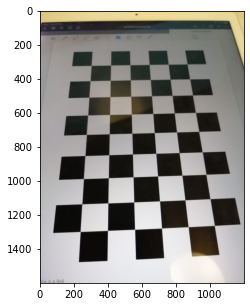

In [22]:
## Display the chessboard image here

fig = plt.figure(figsize=(10,5))
plt.imshow(images_RGB[i])
plt.show()

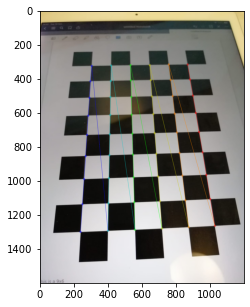

In [23]:
#Chess board coeners from section A

fig = plt.figure(figsize=(10,5))
base_image_E = cv2.cvtColor(drow_corners[i], cv2.COLOR_BGR2RGB)
plt.imshow(base_image_E)
plt.show()

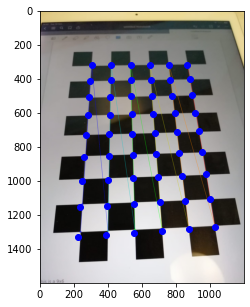

In [24]:
#Projection using camera matrix

world_points_hom = np.ones((world_points[i].shape[0],4))
world_points_hom[:,0:3] = world_points[i][:,:]

proj_points_M = np.dot(M_matrices[i], world_points_hom.T).T
proj_points_M = np.array([proj_points_M[:,0]/proj_points_M[:,2] ,proj_points_M[:,1]/proj_points_M[:,2]]).T
#proj_points_M = proj_points_M .astype("float32")
#proj_world_points_M = cv2.drawChessboardCorners(images_RGB[i].copy(), (9,6), proj_points_M, True)

fig = plt.figure(figsize=(10,5))
plt.imshow(base_image_E)
plt.plot(proj_points_M[:,0], proj_points_M[:,1], 'o', color='blue')
plt.show()

(54, 2)


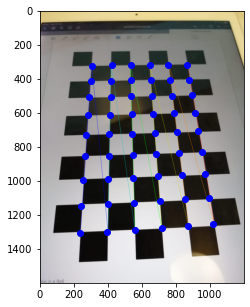

In [25]:
#Projection using cv2.projectPoints

proj_points = cv2.projectPoints(world_points[i], rotation_vecs[i], translation_vecs[i], cameraMatrix, distCoeffs)[0]
proj_points = proj_points.reshape((54,2))
#proj_world_points = cv2.drawChessboardCorners(images_RGB[i].copy(), (9,6), proj_points, True)
print(proj_points.shape)
fig = plt.figure(figsize=(10,5))
plt.imshow(base_image_E)
plt.plot(proj_points[:,0], proj_points[:,1], 'o', color='blue')
plt.show()

## Section F

In [26]:
print("choose image number ->")
i = 9
print(i)

choose image number ->
9


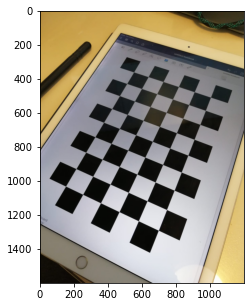

In [27]:
## Display the chessboard image here

fig = plt.figure(figsize=(10,5))
plt.imshow(images_RGB[i])
plt.show()

In [28]:
#axis = np.float32([[3,0,0], [0,3,0], [0,0,-3]]).reshape(-1,3)
axis_2D = np.float32([[1,4,0], [0,5,0], [0,4,-1]]).reshape(-1,3)

proj_points_2D = cv2.projectPoints(axis_2D.copy(), rotation_vecs[i].copy(), translation_vecs[i].copy(), cameraMatrix.copy(), distCoeffs)[0]

In [29]:
axis_3D = np.float32([[0,4,0], [0,5,0], [1,5,0], [1,4,0],
                   [0,4,-1],[0,5,-1],[1,5,-1],[1,4,-1] ]).reshape(-1,3)

proj_points_3D = cv2.projectPoints(axis_3D.copy(), rotation_vecs[i].copy(), translation_vecs[i].copy(), cameraMatrix.copy(), distCoeffs)[0]

In [30]:
def draw_2D(img, corners, imgpts):
    corner = tuple(corners[36].ravel())
    img = cv2.line(img, corner, tuple(imgpts[0].ravel()), (255,0,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[1].ravel()), (0,255,0), 5)
    img = cv2.line(img, corner, tuple(imgpts[2].ravel()), (0,0,255), 5)
    return img

In [31]:
def draw_3D(img, corners, imgpts):
    imgpts = np.int32(imgpts).reshape(-1,2)

    # draw ground floor in green
    img = cv2.drawContours(img, [imgpts[:4]],-1,(0,255,0),-3)

    # draw pillars in blue color
    for i,j in zip(range(4),range(4,8)):
        img = cv2.line(img, tuple(imgpts[i]), tuple(imgpts[j]),(255),3)

    # draw top layer in red color
    img = cv2.drawContours(img, [imgpts[4:]],-1,(0,0,255),3)

    return img

In [32]:
img_F_2D = draw_2D(images_RGB[i].copy(), image_corners[i].copy(), proj_points_2D.copy())
cv2.imwrite("./Q2_F_image_2D_"+ str(i) + ".jpeg", cv2.cvtColor(img_F_2D, cv2.COLOR_BGR2RGB))
img_F_3D = draw_3D(images_RGB[i].copy(), image_corners[i].copy(), proj_points_3D.copy())
cv2.imwrite("./Q2_F_image_3D_"+ str(i) + ".jpeg", cv2.cvtColor(img_F_3D, cv2.COLOR_BGR2RGB))

True

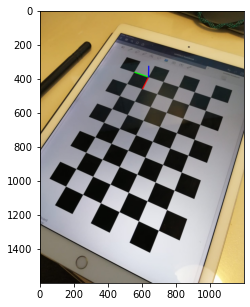

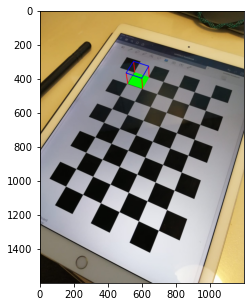

In [33]:
# Draw cube here
fig = plt.figure(figsize=(10,5))
plt.imshow(img_F_2D)
plt.show()
fig = plt.figure(figsize=(10,5))
plt.imshow(img_F_3D)
plt.show()

In [34]:
# Draw rotated cube here

In [35]:
axis_3D = np.float32([[0,0,0], [0,1,0], [1,1,0], [1,0,0],
                   [0,0,-1],[0,1,-1],[1,1,-1],[1,0,-1] ]).reshape(-1,3)

theta_roll = np.radians(0)
theta_pitch = np.radians(0)
theta_yaw = np.radians(30)

x_rot = np.array([[1,0,0],[0,np.cos(theta_roll), -np.sin(theta_roll)],[0, np.sin(theta_roll),np.cos(theta_roll)]])
y_rot = np.array([[np.cos(theta_yaw),0,np.sin(theta_yaw)],[0,1,0],[-np.sin(theta_yaw),0,np.cos(theta_yaw)]])
z_rot = np.array([[np.cos(theta_pitch), -np.sin(theta_pitch),0],[np.sin(theta_pitch),np.cos(theta_pitch),0],[0,0,1]])

rot_mat = np.dot(z_rot, np.dot(y_rot, x_rot))

axis_3D_rot = np.dot(rot_mat, axis_3D.T).T + [0,4,0]

In [36]:
proj_points_3D_rot = cv2.projectPoints(axis_3D_rot.copy(), rotation_vecs[i].copy(), translation_vecs[i].copy(), cameraMatrix.copy(), distCoeffs)[0]

In [37]:
img_F_3D_x = draw_3D(images_RGB[i].copy(), image_corners[i].copy(), proj_points_3D_rot)
cv2.imwrite("./Q2_F_image_3D_rot_x_"+ str(i) + ".jpeg", cv2.cvtColor(img_F_3D_x, cv2.COLOR_BGR2RGB))

True

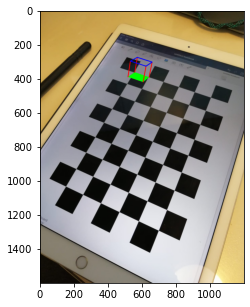

In [38]:
fig = plt.figure(figsize=(10,5))
plt.imshow(img_F_3D_x)
plt.show()